In [124]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy import ndimage
import pywt
import tqdm

In [14]:
files = [f for f in listdir("1dig") if isfile(join("1dig", f))]
files=np.array(files)

In [24]:
info = np.core.defchararray.split(files, "_")
tails = [i[1][:-4] for i in info[np.core.defchararray.equal(np.array([i[0] for i in info]), "key")]]

300it [00:11, 25.55it/s]


array([254, 209, 292])

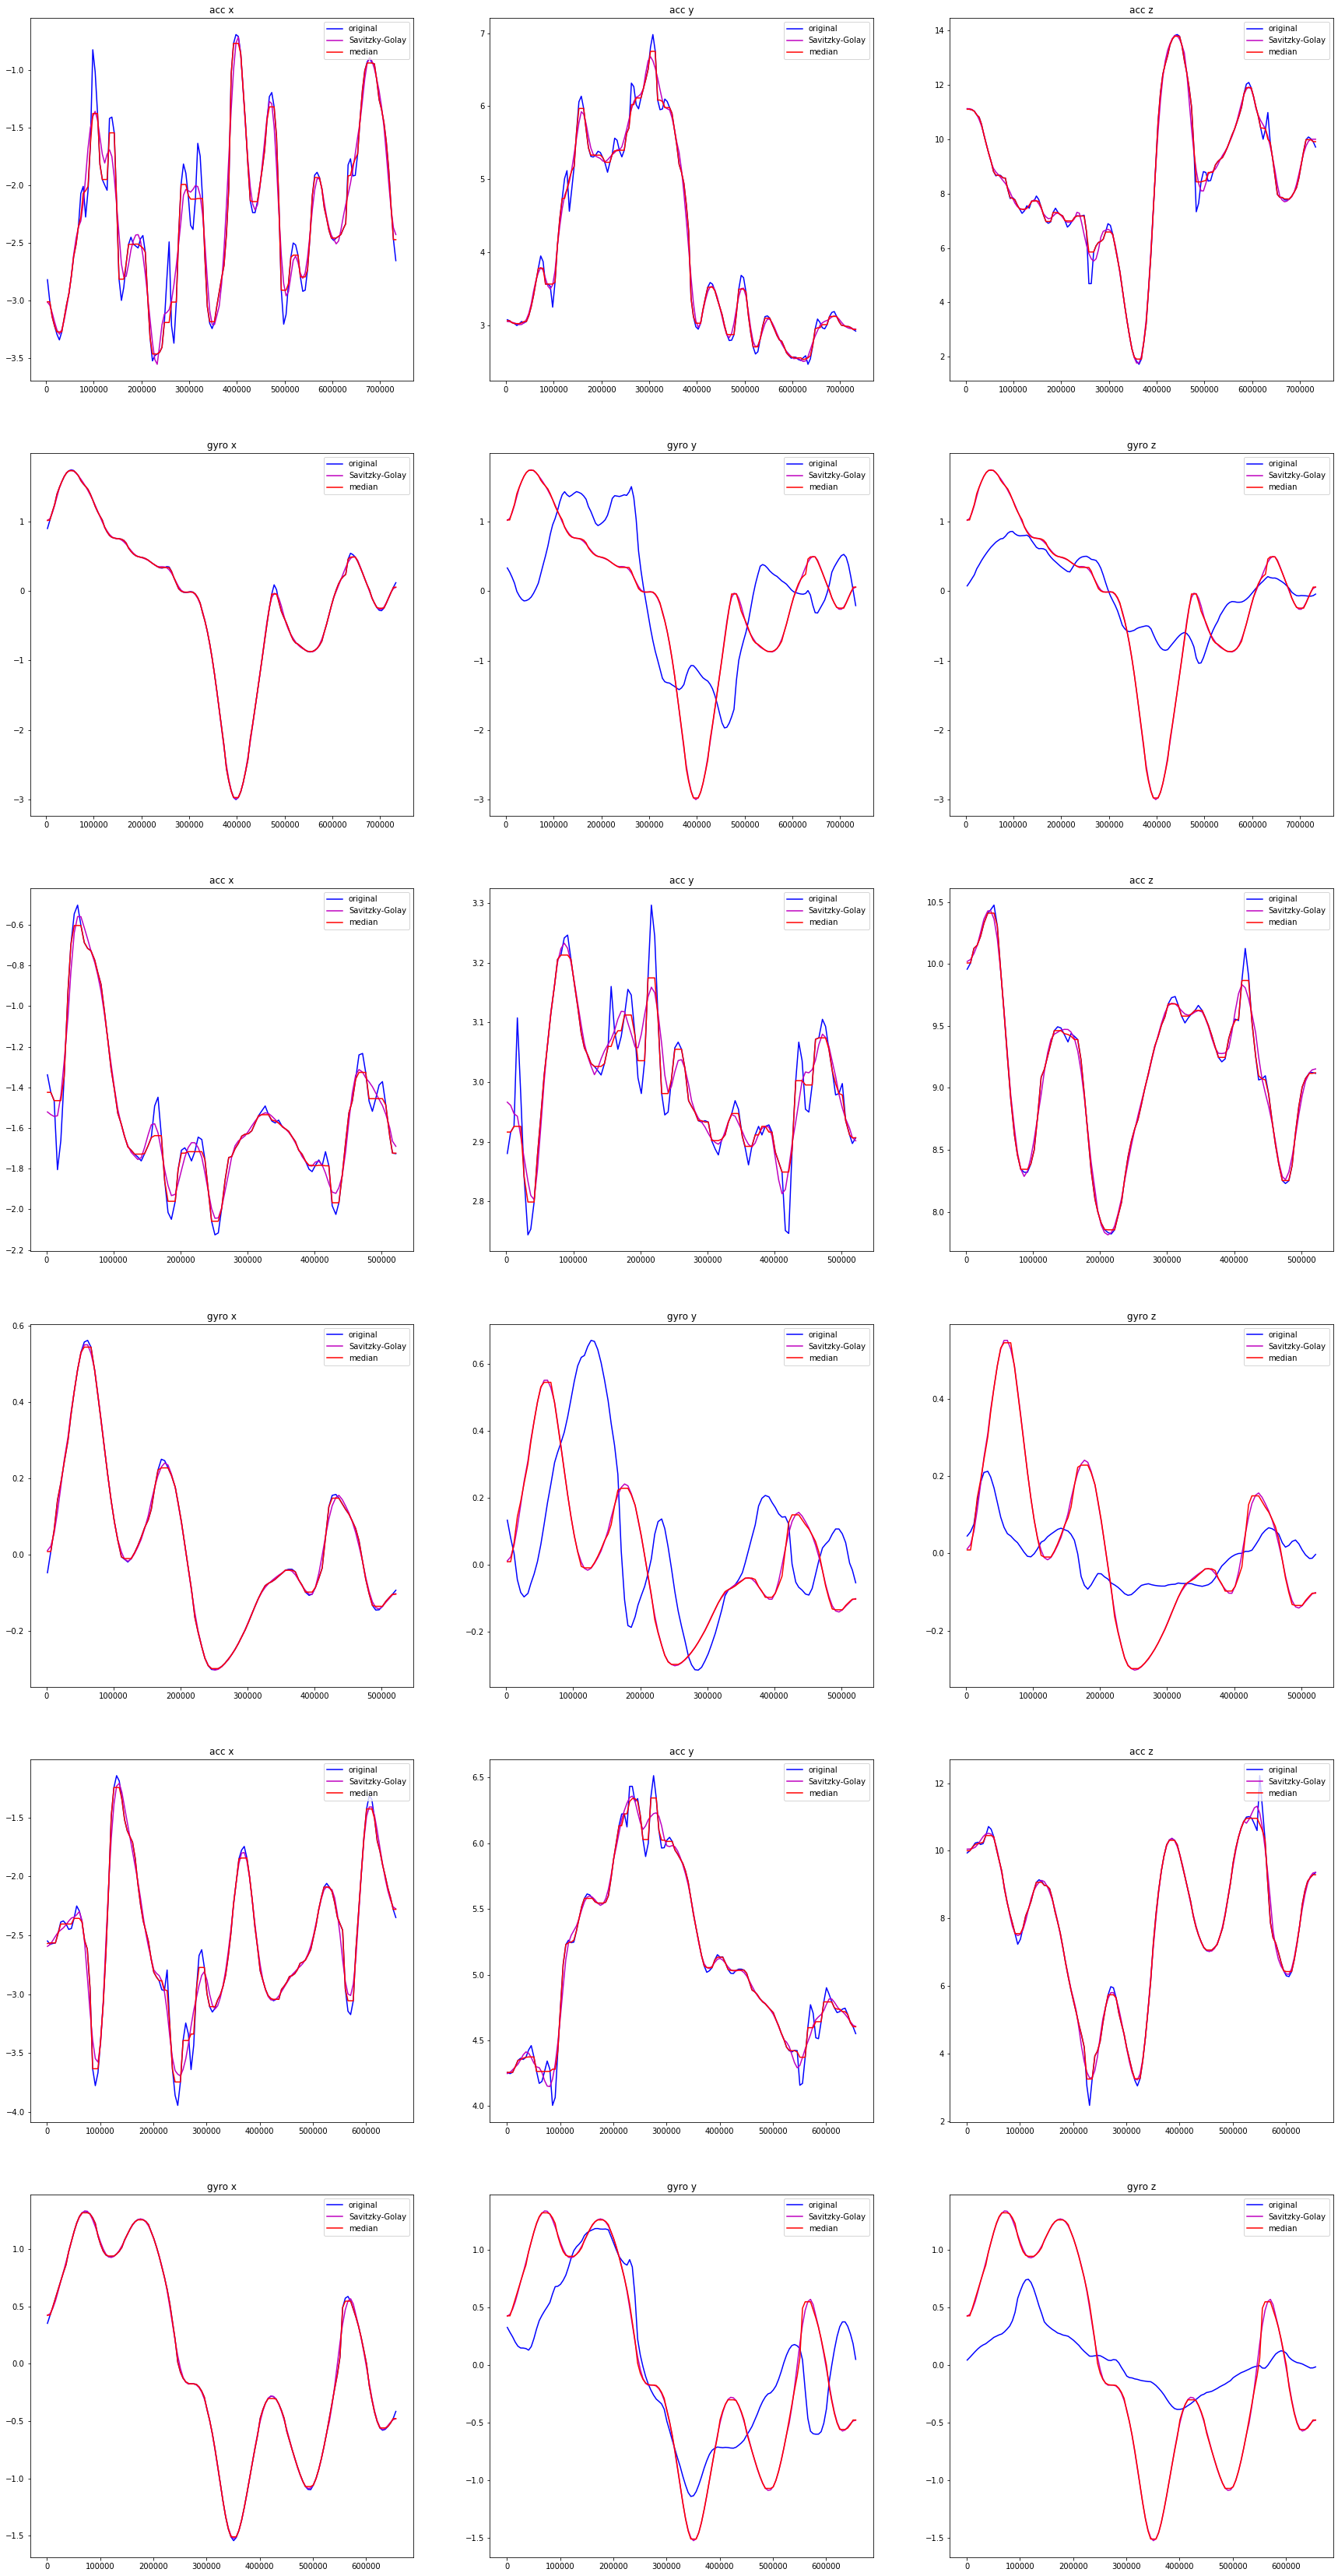

In [126]:
check = np.random.choice(len(tails), size=3, replace=False)
s=1
fig = plt.figure(figsize=(30,60))
for i in tqdm.tqdm(enumerate(tails)):
    key = pd.read_csv("1dig/key_"+i[1]+".csv")
    acc = pd.read_csv("1dig/acc_"+i[1]+".csv")
    gyro = pd.read_csv("1dig/gyro_"+i[1]+".csv")
    acc_filtered_sg_x = scipy.signal.savgol_filter(acc["x"], window_length = 11, polyorder = 2, mode="mirror")
    acc_filtered_med_x = ndimage.median_filter(acc["x"],size=5)
    
    acc_filtered_sg_y = scipy.signal.savgol_filter(acc["y"], window_length = 11, polyorder = 2, mode="mirror")
    acc_filtered_med_y = ndimage.median_filter(acc["y"],size=5)
    
    acc_filtered_sg_z = scipy.signal.savgol_filter(acc["z"], window_length = 11, polyorder = 2, mode="mirror")
    acc_filtered_med_z = ndimage.median_filter(acc["z"],size=5)
    
    x=acc_filtered_sg_x
    y=acc_filtered_sg_y
    z=acc_filtered_sg_z
    data={'x': x, 'y': y, 'z': z, "timestamp": acc["timestamp"]}
    df = pd.DataFrame(data=data, )
    df.to_csv("1dig_Savitzky_Golay/acc_"+i[1]+".csv" ,index=False)
    
    gyro_filtered_sg_x = scipy.signal.savgol_filter(gyro["x"], window_length = 11, polyorder = 2, mode="mirror")
    gyro_filtered_med_x = ndimage.median_filter(gyro["x"],size=5)
    
    gyro_filtered_sg_y = scipy.signal.savgol_filter(gyro["y"], window_length = 11, polyorder = 2, mode="mirror")
    gyro_filtered_med_y = ndimage.median_filter(gyro["y"],size=5)
    
    gyro_filtered_sg_z = scipy.signal.savgol_filter(gyro["z"], window_length = 11, polyorder = 2, mode="mirror")
    gyro_filtered_med_z = ndimage.median_filter(gyro["z"],size=5)
    
    x=gyro_filtered_sg_x
    y=gyro_filtered_sg_y
    z=gyro_filtered_sg_z
    data={'x': x, 'y': y, 'z': z, "timestamp": gyro["timestamp"]}
    df = pd.DataFrame(data=data, )
    df.to_csv("1dig_Savitzky_Golay/gyro_"+i[1]+".csv" ,index=False)
    
    if i[0] in check:
        plt.subplot(6,3,s)
        plt.title("acc x")
        plt.plot(acc["timestamp"], acc["x"], c="b", label = "original")
        plt.plot(acc["timestamp"], acc_filtered_sg_x, c="m", label = "Savitzky-Golay")
        plt.plot(acc["timestamp"], acc_filtered_med_x, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+1)
        plt.plot(acc["timestamp"], acc["y"], c="b", label = "original")
        plt.title("acc y")
        plt.plot(acc["timestamp"], acc_filtered_sg_y, c="m", label = "Savitzky-Golay")
        plt.plot(acc["timestamp"], acc_filtered_med_y, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+2)
        plt.plot(acc["timestamp"], acc["z"], c="b", label = "original")
        plt.title("acc z")
        plt.plot(acc["timestamp"], acc_filtered_sg_z, c="m", label = "Savitzky-Golay")
        plt.plot(acc["timestamp"], acc_filtered_med_z, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+3)
        plt.title("gyro x")
        plt.plot(gyro["timestamp"], gyro["x"], c="b", label = "original")
        plt.plot(gyro["timestamp"], gyro_filtered_sg_x, c="m", label = "Savitzky-Golay")
        plt.plot(gyro["timestamp"], gyro_filtered_med_x, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+4)
        plt.title("gyro y")
        plt.plot(gyro["timestamp"], gyro["y"], c="b", label = "original")
        plt.plot(gyro["timestamp"], gyro_filtered_sg_x, c="m", label = "Savitzky-Golay")
        plt.plot(gyro["timestamp"], gyro_filtered_med_x, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+5)
        plt.title("gyro z")
        plt.plot(gyro["timestamp"], gyro["z"], c="b", label = "original")
        plt.plot(gyro["timestamp"], gyro_filtered_sg_x, c="m", label = "Savitzky-Golay")
        plt.plot(gyro["timestamp"], gyro_filtered_med_x, c="r", label = "median")
        plt.legend(loc="upper right")
        s+=6
check